Reference: https://www.kaggle.com/basu369victor/sentiment-analysis-with-googleplaystoreapp-reviews

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv('datasets/googleplaystore_user_reviews.csv')
Data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [4]:
Data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [5]:
Data = Data.dropna()

In [6]:
Data['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

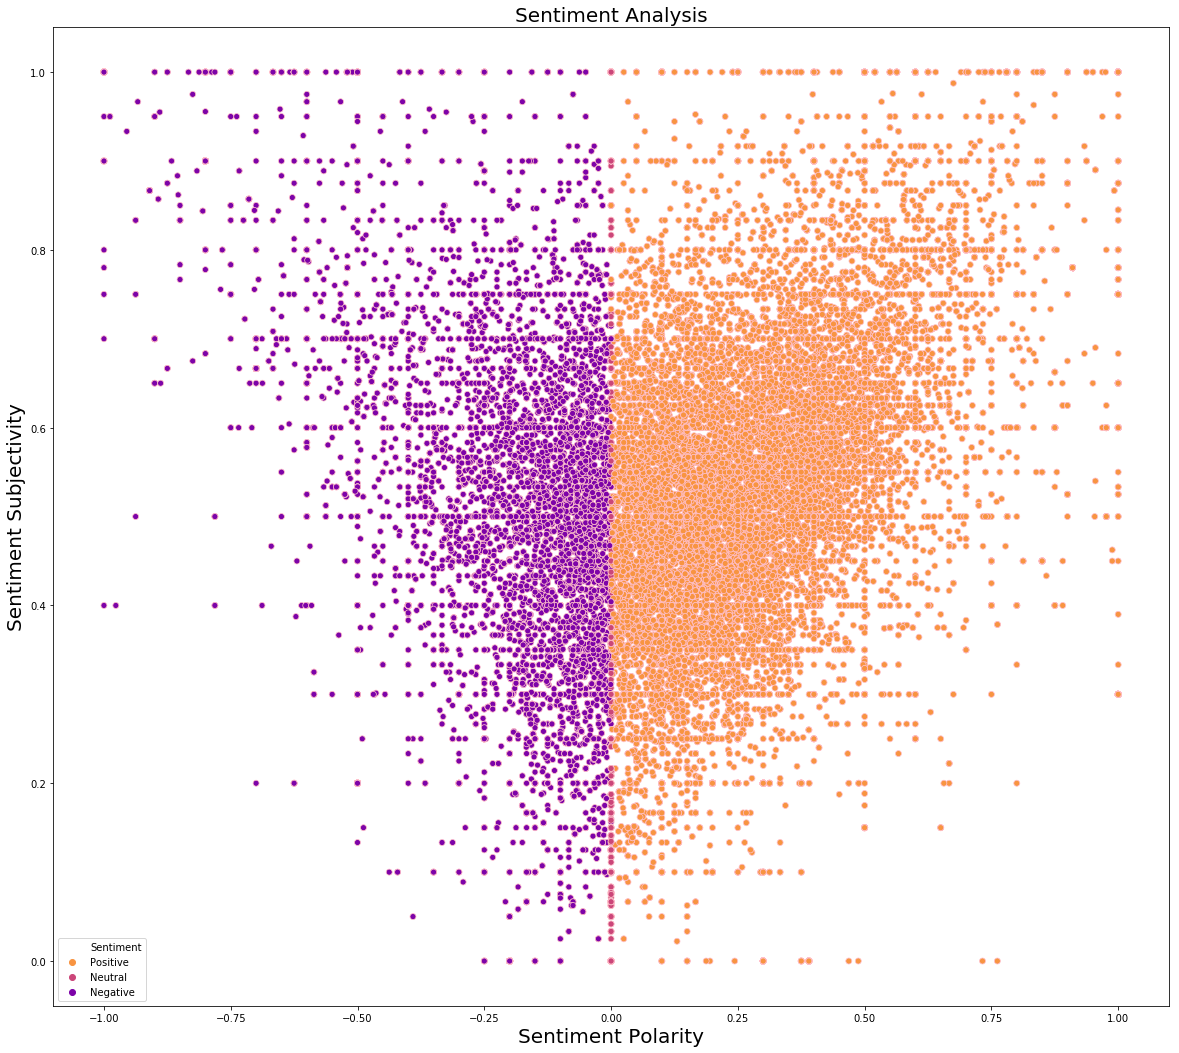

In [7]:
plt.figure(figsize=(20,18))
j = sns.scatterplot(Data['Sentiment_Polarity'],Data['Sentiment_Subjectivity'],hue=Data['Sentiment'], edgecolor='pink',palette="plasma_r")
plt.xlabel('Sentiment Polarity', fontsize=20)
plt.ylabel('Sentiment Subjectivity', fontsize=20)
plt.title("Sentiment Analysis", fontsize=20)
plt.show()

In [12]:
import re
import nltk
# nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kokkok/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
Data.shape

(37427, 5)

In [10]:
Data["index"] = range(0,Data.shape[0])
Data = Data.set_index("index")
Data.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
index,,,,,
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
37426,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


In [26]:
STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,Data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ',Data['Translated_Review'][i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',Data['Translated_Review'][i])
    review = re.sub('[^0-9a-z #+_♥️]', ' ',Data['Translated_Review'][i])#Remove bad symbols
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if token not in STOPWORDS]
    review=' '.join(review)
    corpus.append(review)
corpus

['like eat delici food hat cook food case 10 est ood help lot also est efor helf ife',
 'help eat healthi exercis regular basi',
 'ork great especi go groceri store',
 'est idea us',
 'est way',
 'maze',
 'ook forward app',
 'help site help food get',
 'good',
 'seful inform amount spell error question valid inform share nce fix 5 star given',
 'hank reat app dd arthriti eye immun kidney liver detox food pleas',
 'reatest ever omplet awesom maintain health must ppl ove',
 'ood health ood health first prioriti',
 'ealth import world either life think',
 'rs sunita bhati thank develop make kind app realli good healthi food bodi',
 'eri seful diabet age 30 need control sugar thank',
 'ne greatest app',
 'good nice',
 'ealthi ealli help',
 'od health',
 '5',
 'n excel use',
 'found lot wealth form health',
 'ecaus found import',
 'ealthi ate',
 'eri good impli good',
 'n test',
 'ood',
 'hank advic ownload dobe reader still get recip book',
 'recip book nabl recip book',
 'bsolut abul heno

In [27]:
words = []
Sentiment_Polarity=[]
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words cantain all the words in the dataset
    Sentiment_Polarity.append
words

['like',
 'eat',
 'delici',
 'food',
 'hat',
 'cook',
 'food',
 'case',
 '10',
 'est',
 'ood',
 'help',
 'lot',
 'also',
 'est',
 'efor',
 'helf',
 'ife',
 'help',
 'eat',
 'healthi',
 'exercis',
 'regular',
 'basi',
 'ork',
 'great',
 'especi',
 'go',
 'groceri',
 'store',
 'est',
 'idea',
 'us',
 'est',
 'way',
 'maze',
 'ook',
 'forward',
 'app',
 'help',
 'site',
 'help',
 'food',
 'get',
 'good',
 'seful',
 'inform',
 'amount',
 'spell',
 'error',
 'question',
 'valid',
 'inform',
 'share',
 'nce',
 'fix',
 '5',
 'star',
 'given',
 'hank',
 'reat',
 'app',
 'dd',
 'arthriti',
 'eye',
 'immun',
 'kidney',
 'liver',
 'detox',
 'food',
 'pleas',
 'reatest',
 'ever',
 'omplet',
 'awesom',
 'maintain',
 'health',
 'must',
 'ppl',
 'ove',
 'ood',
 'health',
 'ood',
 'health',
 'first',
 'prioriti',
 'ealth',
 'import',
 'world',
 'either',
 'life',
 'think',
 'rs',
 'sunita',
 'bhati',
 'thank',
 'develop',
 'make',
 'kind',
 'app',
 'realli',
 'good',
 'healthi',
 'food',
 'bodi',
 'er

In [28]:
from collections import Counter
words_counts = Counter(words)

In [29]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

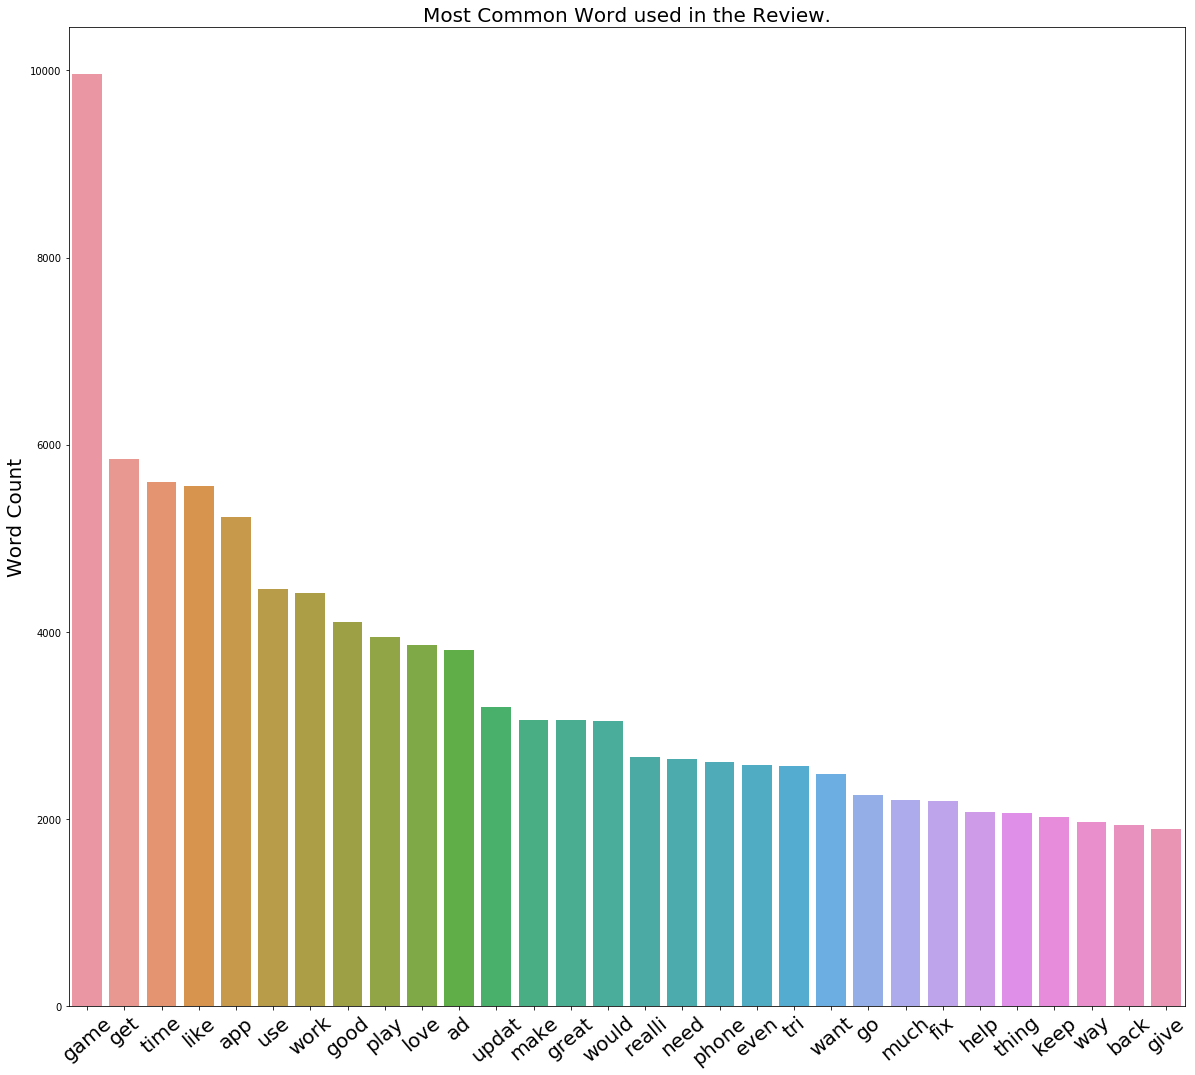

In [30]:
plt.figure(figsize=(20,18))
plot = sns.barplot(np.arange(30), most_commmom_CountList[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList[0:30], fontsize=20, rotation=40)
plt.title('Most Common Word used in the Review.', fontsize=20)
plt.show()

In [31]:
k = most_commmom_wordList[0:30]
Sentiment_Polarity=[]
Positive=[]
Neutral=[]
Negative=[]
for i in k:
    Sentiment=[]
    for z in corpus:
        #if i in z:
            #Sentiment.append(Data['Sentiment_Polarity'][corpus.index(z)])
    #Sentiment_Polarity.append(Sentiment)
        if i in z and Data['Sentiment'][corpus.index(z)]=='Positive':
            Positive.append(i)
        if i in z and Data['Sentiment'][corpus.index(z)]=='Neutral':
            Neutral.append(i)
        if i in z and Data['Sentiment'][corpus.index(z)]=='Negative':
            Negative.append(i)

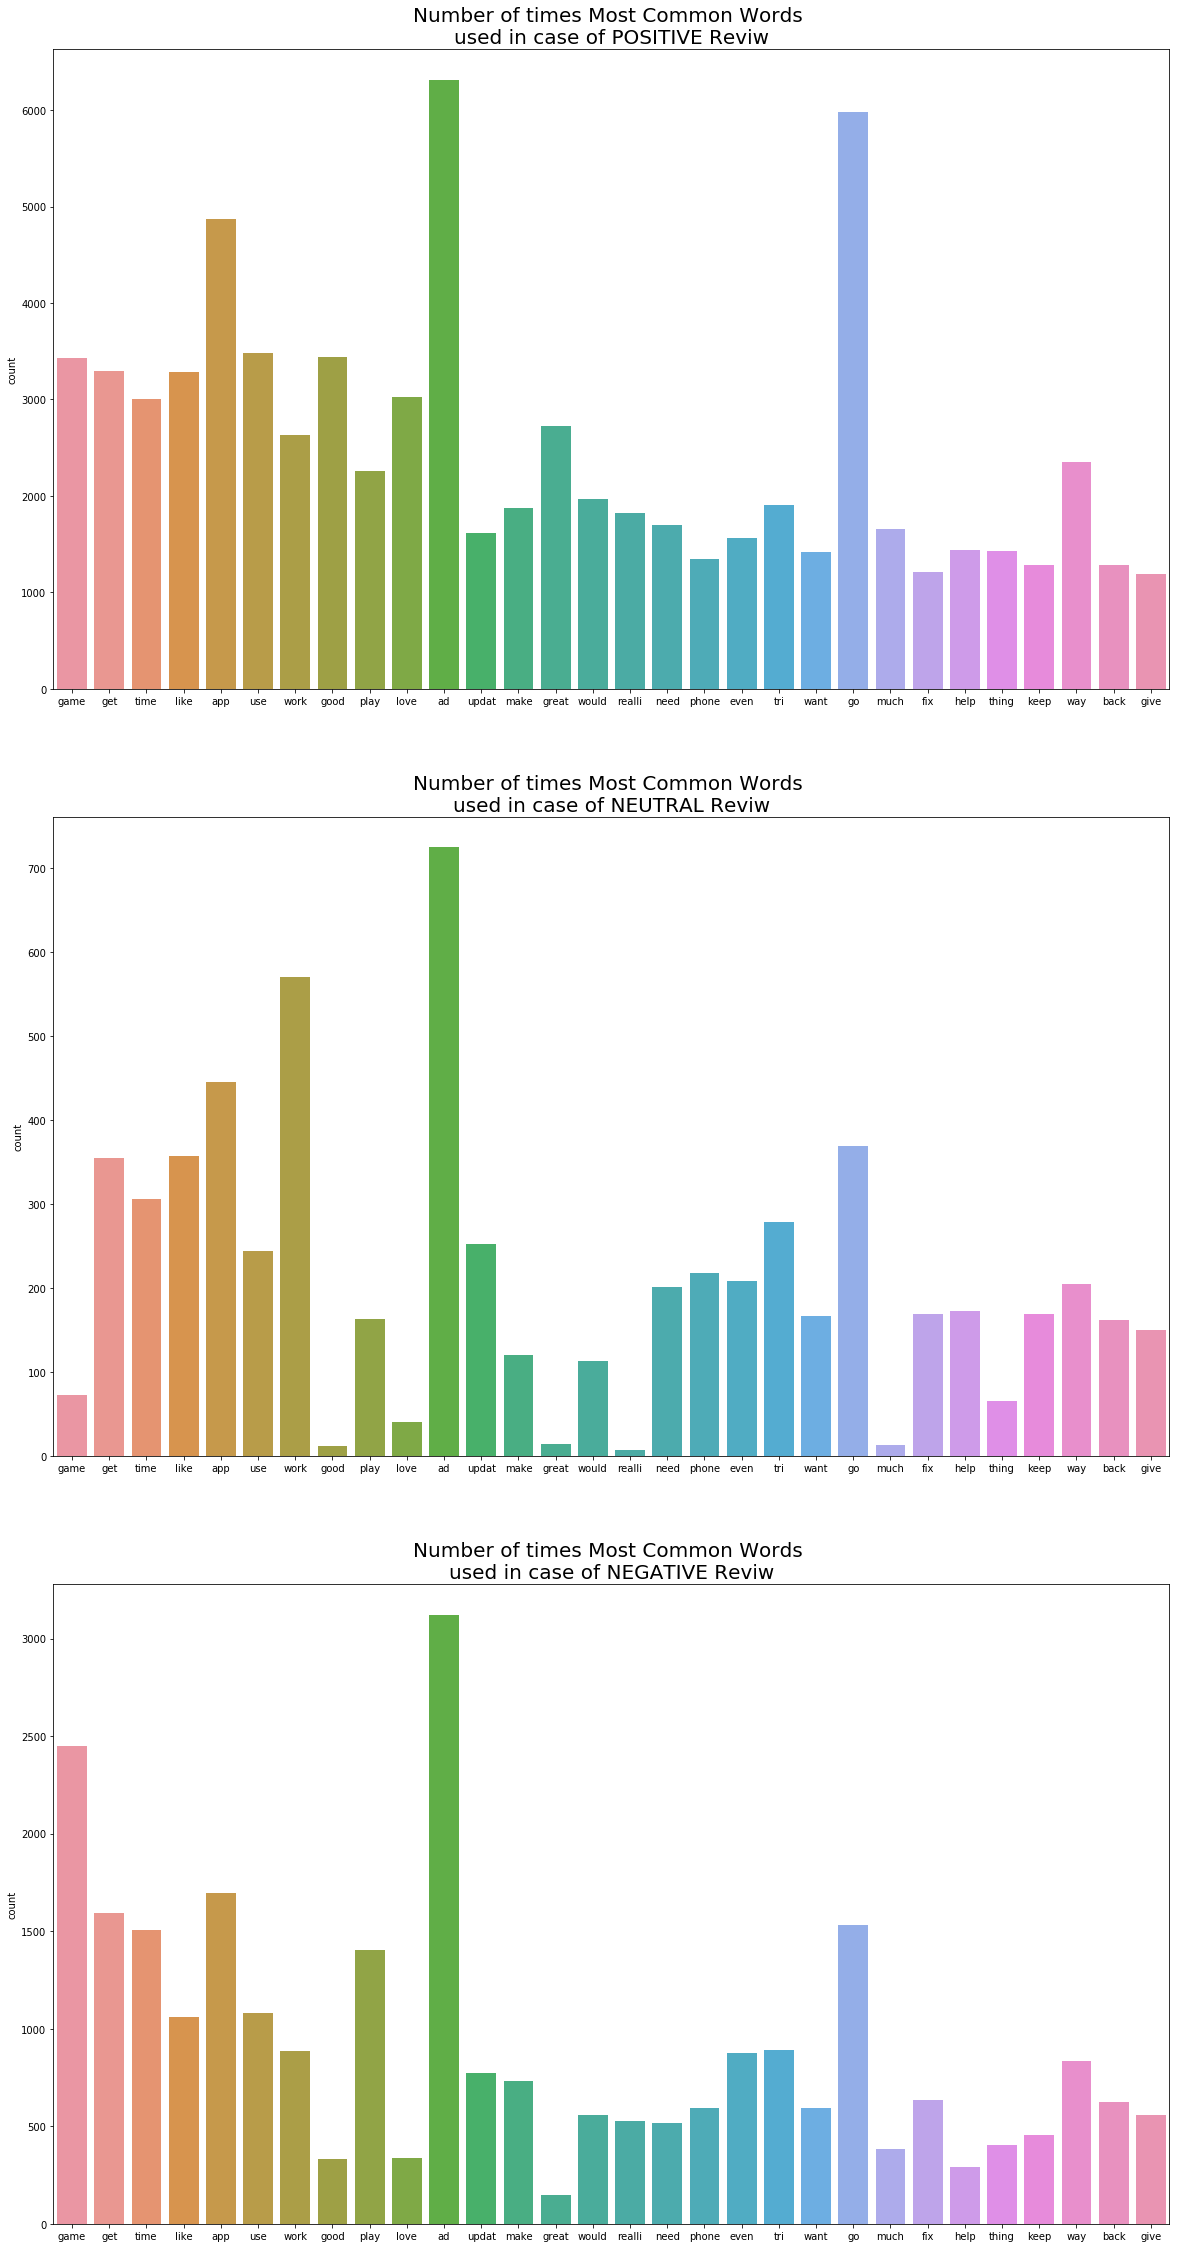

In [32]:
f,ax = plt.subplots(3,1,figsize=(20,40))
c1 = sns.countplot(Positive, ax=ax[0])
c2 = sns.countplot(Neutral,ax=ax[1])
c3 = sns.countplot(Negative,ax=ax[2])
ax[0].set_title("Number of times Most Common Words \nused in case of POSITIVE Reviw",fontsize=20)
ax[1].set_title("Number of times Most Common Words \nused in case of NEUTRAL Reviw",fontsize=20)
ax[2].set_title("Number of times Most Common Words \nused in case of NEGATIVE Reviw",fontsize=20)
plt.show()